# Required software and hardware


For this course we'll be using, mainly, two libraries:

- [Pytorch](https://pytorch.org/): Pytorch is an excellent library for tensor computation (i.e. mainly, neural networks and deep learning). It is fast, supports GPU and CPU (and partially TPU), and is really pythonic. 
- [fastai](https://www.fast.ai/): fastai is a wrapper (higher level) library on top of pytorch, that simplifies most of the more repetitive and common tasks we have to do with pytorch.

The first cells below will show you how to ascertain we have such software and that we are running using a GPU.



To ascertain that we are running on a GPU we'll use nvidia-smi (all GPUs on colab.google are Nvidia). 

```
!nvidia-smi
```




In [20]:
!nvidia-smi

Fri Nov 20 09:14:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    10W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

We need to have fastai installed. With `!pip install fastai` we'll install it, if its already installed it will tell us so, showing the version we have. 

In [21]:
!pip install fastai 

If we have fastai v. 1.0.61 (or 1.0.x) we will need an older version of torch and torchvision, uncomment line below to install them.


In [22]:
# !pip install torch==1.4+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html



# Colab drive

***ONLY FOR THOSE USING COLAB***

To keep our data safe (colab.google removes all stuff locally on all virtual machines each time they are assigned to any user), we will map google-drive to colab runtime and make fastai to store things there.


In [23]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
os.environ['FASTAI_HOME'] = '/content/drive/My Drive/fastai'

# Lesson 1- Our First Application:  DOG or CAT.

In this first session we'll be building a simple application of deep learning. It will serve a few purposes:

- It will show you, somehow, what you can achieve with Neural Networks, so you can start think on how to approach your project and solve whatever you need to do with NN. 
- It will, most definitively than with the test notebook, test wether you can really run fastai, pytorch, etc. 

I will intersped text information within the code cells, and, of course, I'll be explaining you stuff, but do not hesitate to ask things on the classes forums. 


We'll begin by importing all the required packages. I will try to avoid having import statements beyond these first cells, so you'll be able to locate them faster. 

As we'll be doing image recognition as a classification example, we'll load the vision library, and the metrics library. 


In [25]:
from fastai.vision import *
from fastai.metrics import error_rate

In [26]:
import fastai.vision as fvi


Both import methods work, but, my two cents, never use the first one on scripts, it's more error prone. 

For notebooks (small ones specially) it is ok. 

## Get the data

Our first step is transfering the data to where the notebook is running. 

If you are running this in your own machine, once you have done this step and the following one (pepare the data), you can skip them, as you'll have already the data ready.

If you are running this on colab (or similar platforms), as each time you are connected to a different runtime your hard disk is from a new machine, you'll have to do these steps. Unless you are using google drive to store the data, then, this data will be stored there, and you'll already have it always (although you have to connect to google drive each time). 

The first function we'll be using to transfer data is one of those that fastai excels at:

untar_data()

This function will, given a URL, download the data from such URL, extract it (data should be tgz), and return us the path where it is stored. If data is already there, it will not download it. 

Another thing that's included with fastai is a collection of URLs of some of the most used datasets available (and they are stored on amazon's AWS, so we can easily download them into our machines). 



In [28]:
dir(fvi.URLs)

['ADULT_SAMPLE',
 'AG_NEWS',
 'AMAZON_REVIEWS',
 'AMAZON_REVIEWS_POLARITY',
 'BIWI_HEAD_POSE',
 'BIWI_SAMPLE',
 'CALTECH_101',
 'CAMVID',
 'CAMVID_TINY',
 'CARS',
 'CIFAR',
 'CIFAR_100',
 'COCO_SAMPLE',
 'COCO_TINY',
 'CUB_200_2011',
 'DBPEDIA',
 'DOGS',
 'FLOWERS',
 'FOOD',
 'HUMAN_NUMBERS',
 'IMAGENETTE',
 'IMAGENETTE_160',
 'IMAGENETTE_320',
 'IMAGEWOOF',
 'IMAGEWOOF_160',
 'IMAGEWOOF_320',
 'IMDB',
 'IMDB_SAMPLE',
 'LOCAL_PATH',
 'LSUN_BEDROOMS',
 'ML_SAMPLE',
 'MNIST',
 'MNIST_SAMPLE',
 'MNIST_TINY',
 'MNIST_VAR_SIZE_TINY',
 'MT_ENG_FRA',
 'OPENAI_TRANSFORMER',
 'PASCAL_2007',
 'PASCAL_2012',
 'PETS',
 'PLANET_SAMPLE',
 'PLANET_TINY',
 'S3',
 'S3_COCO',
 'S3_IMAGE',
 'S3_IMAGELOC',
 'S3_MODEL',
 'S3_NLP',
 'SKIN_LESION',
 'SOGOU_NEWS',
 'WIKITEXT',
 'WIKITEXT_TINY',
 'WT103_BWD',
 'WT103_FWD',
 'YAHOO_ANSWERS',
 'YELP_REVIEWS',
 'YELP_REVIEWS_POLARITY',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__

We will use DOGS a dataset with photographs of cats and dogs. It's available at:

`fastai.vision.URLs.DOGS`



In [27]:
print(fvi.URLs.DOGS)

http://files.fast.ai/data/examples/dogscats


In [29]:
dataset = untar_data(URLs.DOGS)

The return of `untar_data` is a `PosixPath` typed variable that is where the data is stored on disk. Usually, first thing you'll wanna do is explore that directories, to see how data is organized, in order to load it and prepare it for running.


In [30]:
dataset.ls()

[PosixPath('/content/drive/My Drive/fastai/data/dogscats/sample'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/valid'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/test1')]

In [31]:
data_train = dataset/"train"

In [32]:
data_train.ls()

[PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/cats'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/dogs')]

We'll use now another fastai toolbelt function: `get_image_files`, that will recurse some directories, returning us with an array of all filenames of any image files it founds.

In [33]:
fnames = get_image_files(data_train, recurse=True)

We'll need another thing besides images, that is labels telling us which class is each image. In this case labels can be extracted from the filename as can be easily seen below, in other cases we'll get them on separate files, etc.


We'll use `ImageDataBunch.from_name_re` factory method to get Images and Labels by applying a RE to each filename returning the corresponding label.

In [34]:
fnames[:5]

[PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/cats/cat.2921.jpg'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/cats/cat.10435.jpg'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/cats/cat.394.jpg'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/cats/cat.4319.jpg'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/cats/cat.5202.jpg')]

In [35]:
fnames[-5:]

[PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/dogs/dog.11138.jpg'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/dogs/dog.6373.jpg'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/dogs/dog.9467.jpg'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/dogs/dog.11276.jpg'),
 PosixPath('/content/drive/My Drive/fastai/data/dogscats/train/dogs/dog.4555.jpg')]

In [37]:
m = re.findall('([cd][ao][tg])\.\d+\.jpg',str(fnames[4]))
m

['cat']

With this pattern we can get our label from the filename, so we'll create a r'' string (regular expression string) for python, and use it to build the ImageDataBunch.


In [38]:
pattern = r'([cd][ao][tg])\.\d+\.jpg'

In [39]:
data = ImageDataBunch.from_name_re(data_train,fnames,pattern,ds_tfms=get_transforms(),size=224, bs=64).normalize(imagenet_stats)

We can check everything is right.

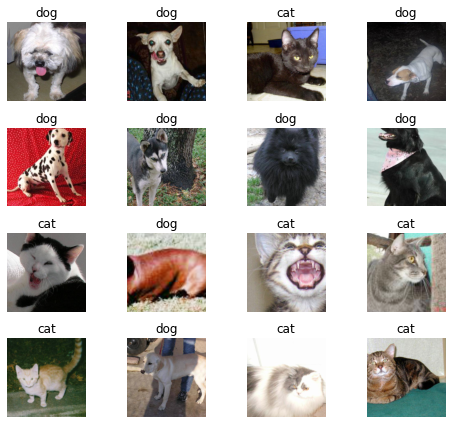

In [40]:
data.show_batch(rows=4, figsize=(7,6))

In [42]:
print(data.classes)
len(data.classes),data.c

['cat', 'dog']


(2, 2)

# Neural Network Creation and training

we can now create our Neural Network. In fastai that is called a learner. We will create a Convolutional Neural Network following a well know architecture called Resnet34.

It is described in:

[Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun

Authors describe several architectures (ResNet34, ResNet50, ... ResNet152), we'll use the smaller one, it's enough for our purposes and trains faster.



In [43]:
learn = cnn_learner(data,models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [44]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

And we'll tray, we'll go for 4 epochs (4 rounds of training), for more complex problems, with bigger networks we'll need more. 

In [46]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.107788,0.038798,0.013478,04:28
1,0.063423,0.026083,0.010000,04:28
2,0.040949,0.023767,0.008913,04:32
3,0.029976,0.022997,0.008043,04:31


After training it, we'll save it to a file, so we'll be able to load it without having to re-train it.

In [47]:
learn.save("catsdogs-round1")

To load it we have to create a new network (same architecture and metrics) and then `load()`

In [48]:
learn2 = cnn_learner(data, models.resnet34, metrics=error_rate)
learn2 = learn2.load('catsdogs-round1')

We can now create a classifier from the network, and run it all on all validation set (4600 photos, we trained on 18400). 

In [49]:
interp = ClassificationInterpretation.from_learner(learn2)


In [50]:
losses,idxs = interp.top_losses()


In [51]:
len(losses)

4600

In [52]:
len(data.valid_ds)

4600

We plot the worst classifications from the validation set.

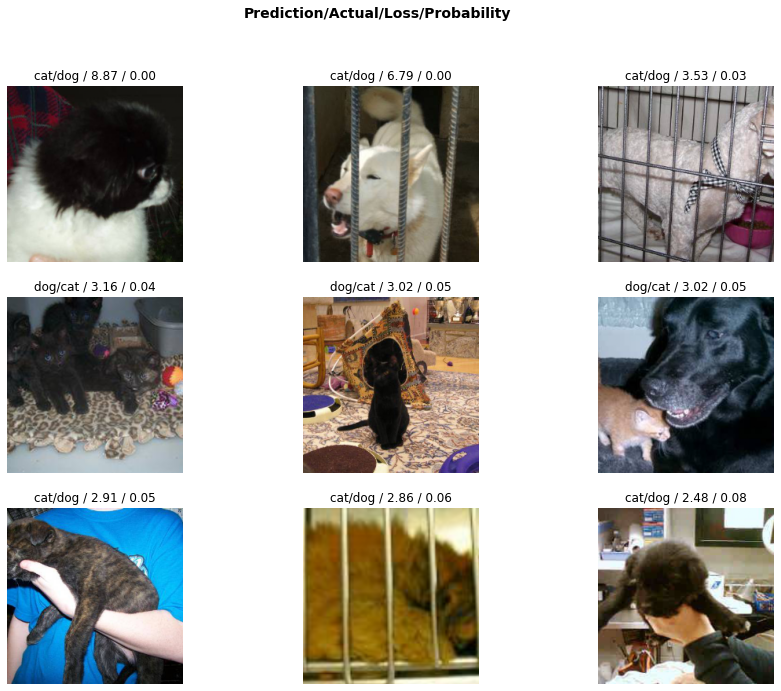

In [53]:
interp.plot_top_losses(9, figsize=(15,11))

And we can plot the confusion matrix of the classification problem.


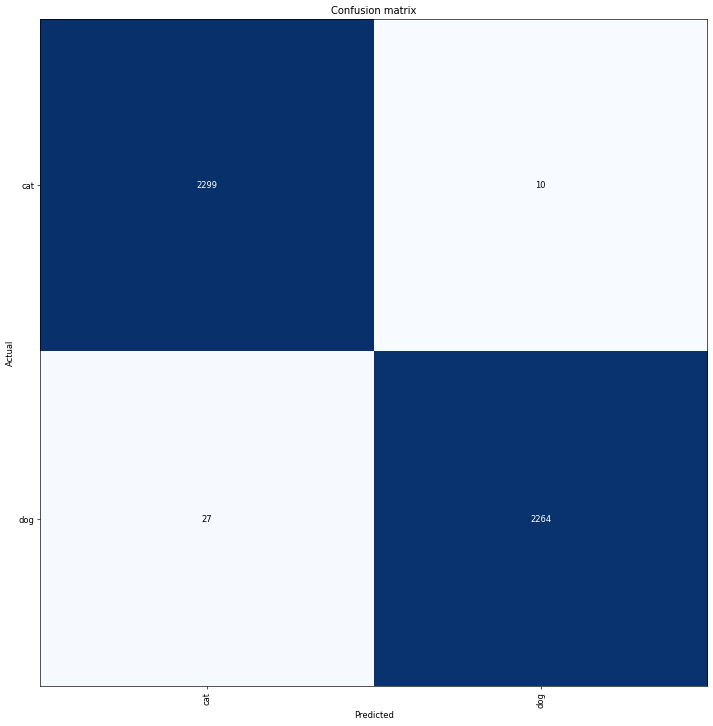

In [54]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)